In [5]:
import anndata as ad
import numpy as np
import scanpy as sp
import scanpy as sc
from model.neighbors import neighbors
from scipy.spatial.distance import cdist
from sklearn.neighbors import KNeighborsTransformer
import matplotlib.pyplot as plt

In [6]:
theta = np.linspace(0,2*np.pi,1000)
x = np.cos(theta)*(0.5*np.cos(6*theta)+1)
y = np.sin(theta)*(0.4*np.cos(6*theta)+1)
z = 0.4*np.sin(6*theta)
points = np.vstack([x,y,z]).T
R = np.random.randn(100, 3)
R = np.linalg.qr(R)[0]  # 正交化
embedded_data = points @ R.T
Z = np.random.randn(1000, 100)
rho = 0.05 + 0.95 * (1 + np.cos(6 * theta)) / 2
noise = Z / np.linalg.norm(Z, axis=1, keepdims=True) * rho[:, np.newaxis]
noisy_data = embedded_data + noise
distance_matrix = cdist(noisy_data, noisy_data, 'euclidean')
normalization_factor = np.sqrt(np.mean(distance_matrix ** 2))
noisy_data /= normalization_factor
ad_data = ad.AnnData(noisy_data,obs={"theta":theta})

/tmp/ipykernel_112274/116803409.py:4: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


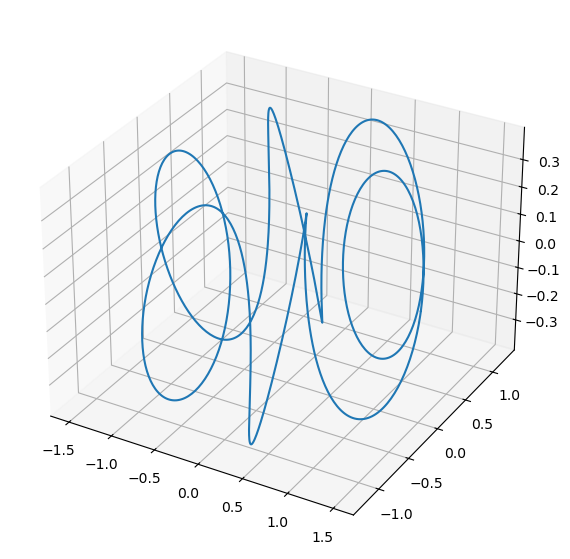

In [7]:
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(projection="3d")
ax.plot(x,y,z)
fig.show()

In [8]:

big_knn_ad = neighbors(ad_data,n_neighbors=30,n_initial_neighbors=30,use_rep='X',copy=True)
small_knn_ad = neighbors(ad_data,n_neighbors=10,n_initial_neighbors=10,use_rep='X',copy=True)
min_trimed_ad = neighbors(ad_data,n_neighbors=10,n_initial_neighbors=30,scheme="min",use_rep="X",copy=True)
max_trimed_ad = neighbors(ad_data,n_neighbors=10,n_initial_neighbors=30,scheme="max",use_rep="X",copy=True)

100%|██████████| 1000/1000 [00:13<00:00, 73.30it/s]


In [18]:
import networkx as nx
def drawGraph(adj,curvature):
    graph = nx.from_numpy_array(adj)
    curvature_graph = nx.from_numpy_array(curvature)
    edge_value = nx.get_edge_attributes(curvature_graph,'weight')
    edge_value = edge_value.values()
    nx.draw(graph,node_color='white',node_size=1,width=0.2,edge_color=edge_value,edge_cmap=plt.cm.viridis)
    plt.show()
    return

In [10]:
adj_trimed =min_trimed_ad.obsp["connectivities"]
oring = small_knn_ad.obsp["connectivities"]

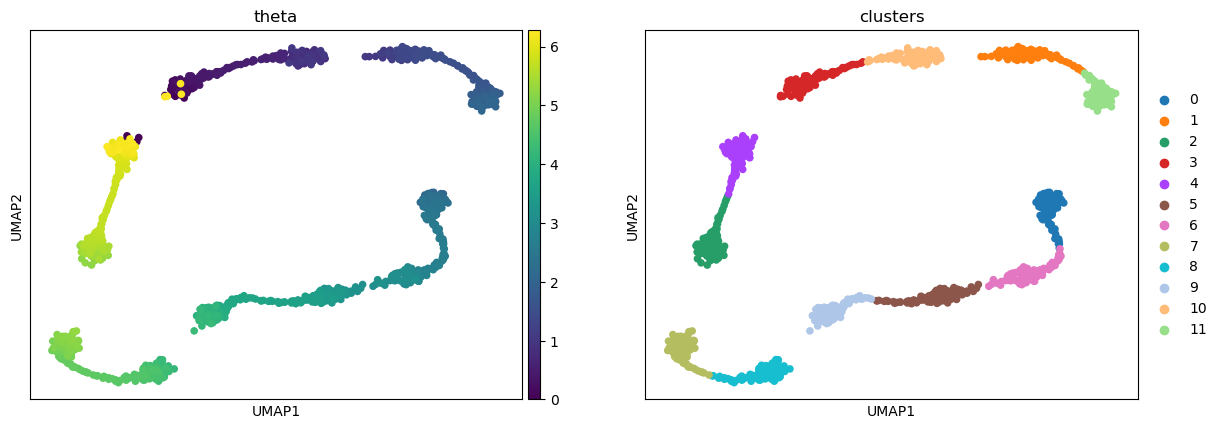

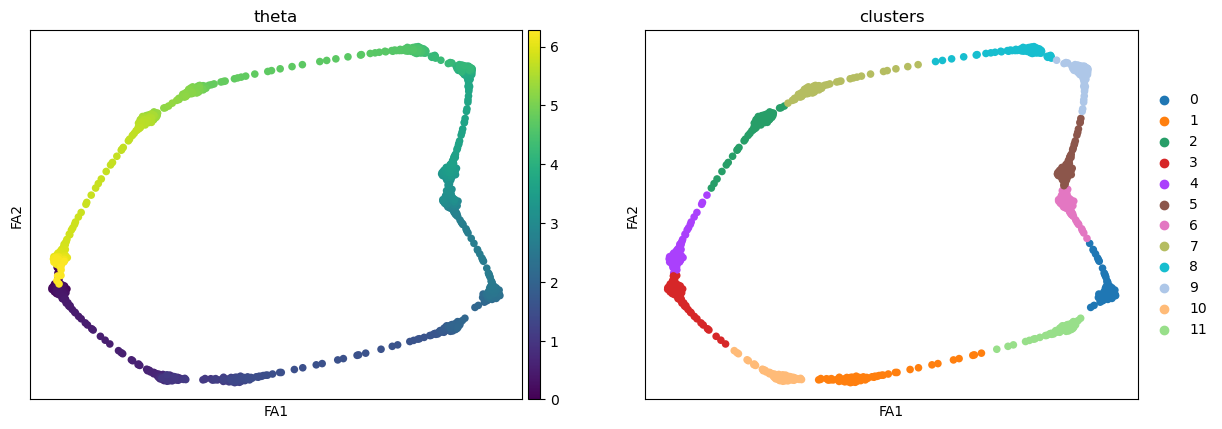

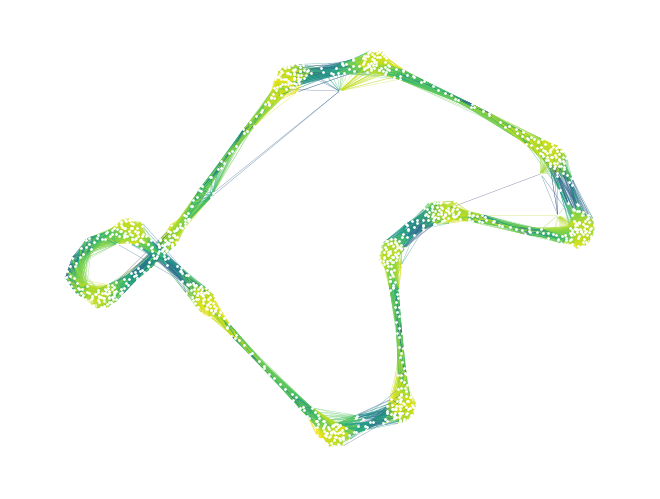

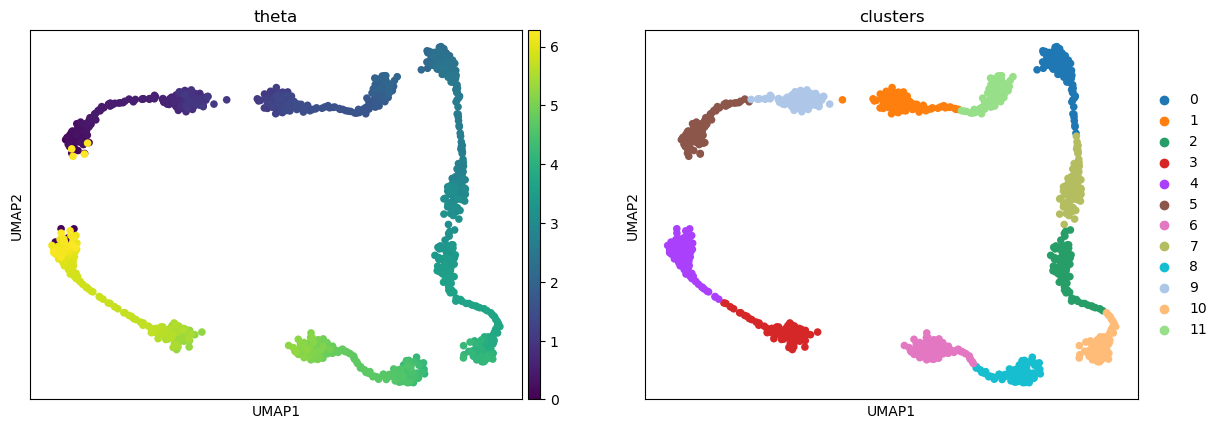

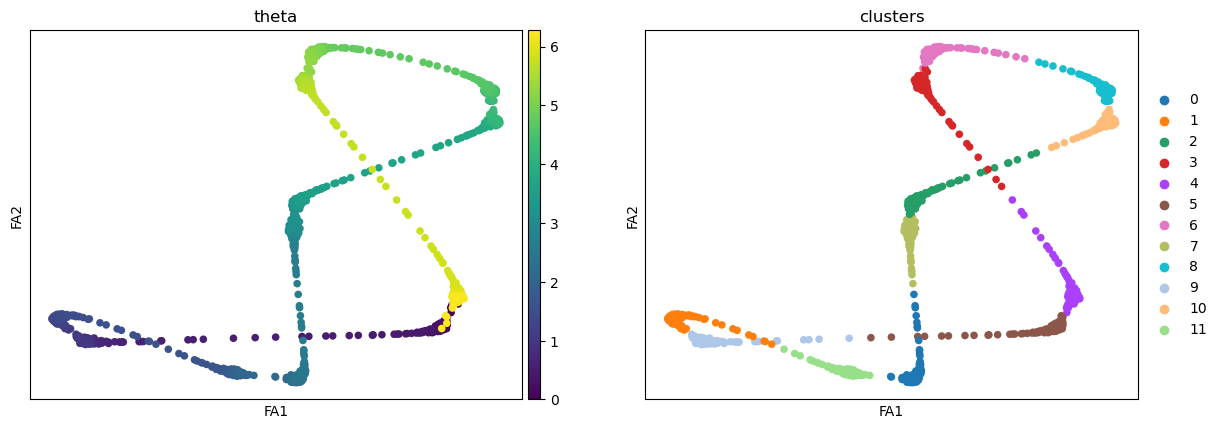

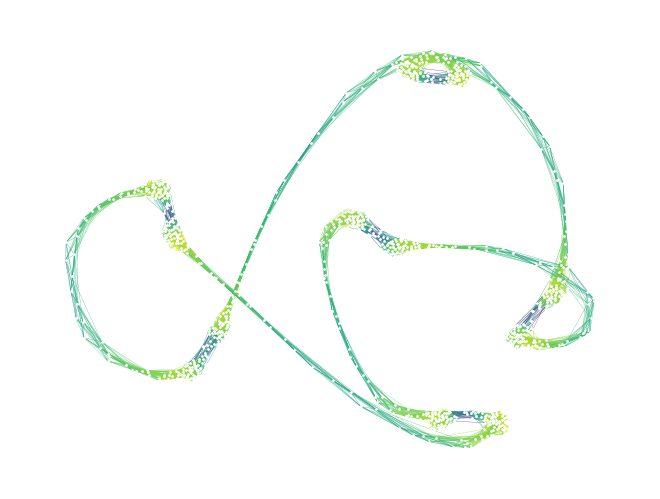

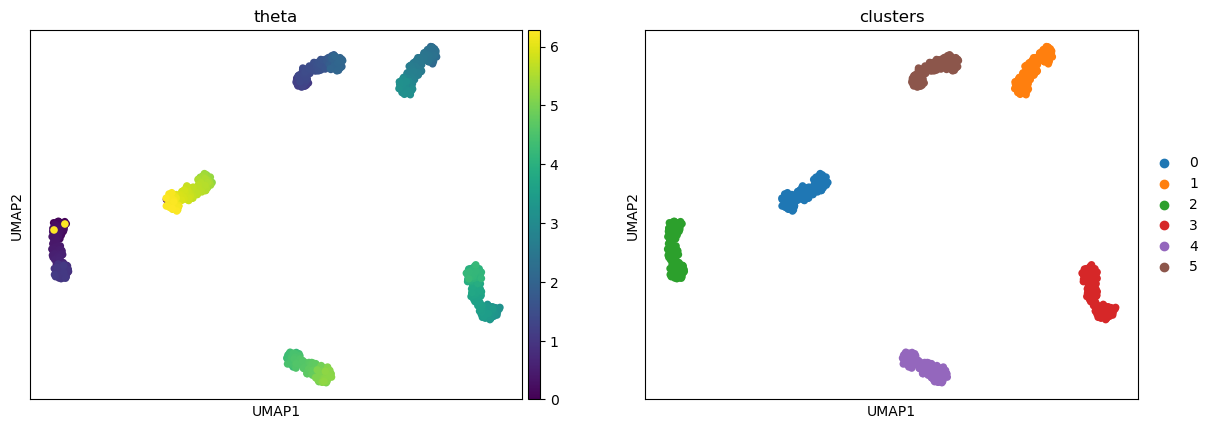

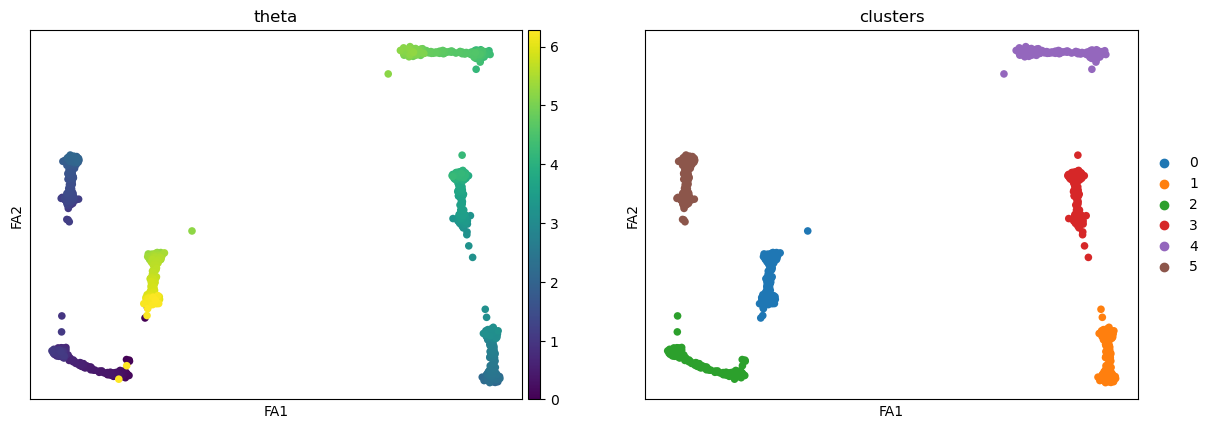

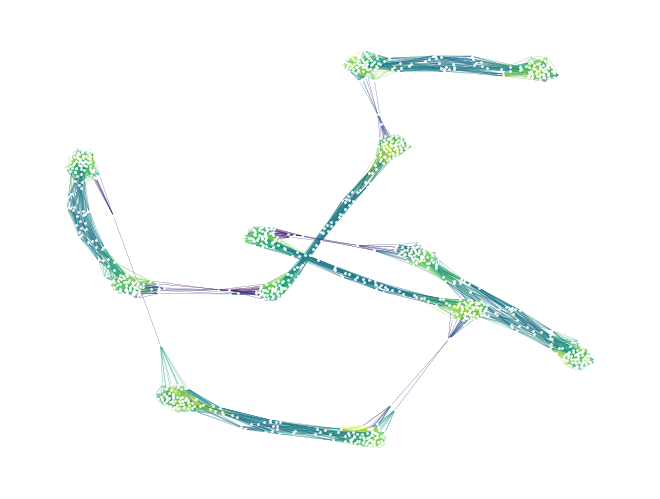

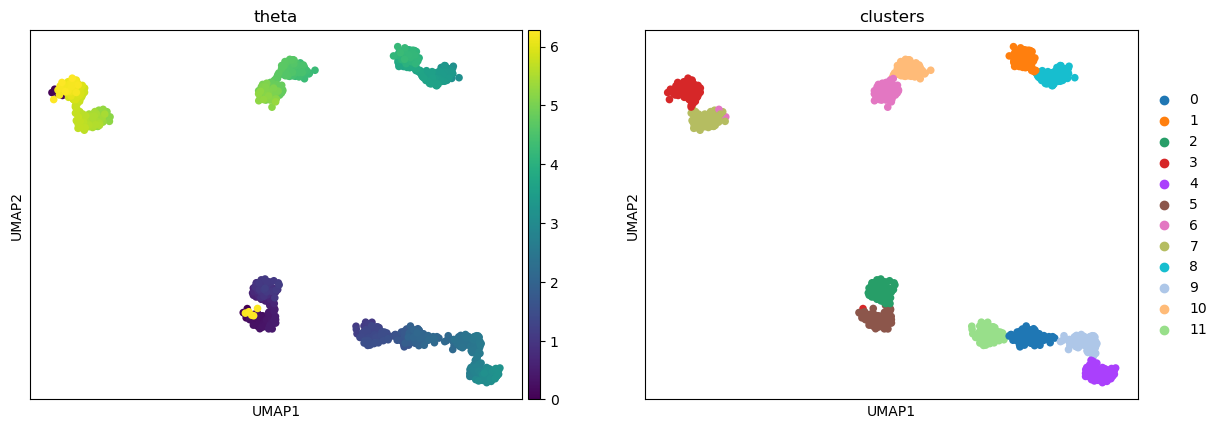

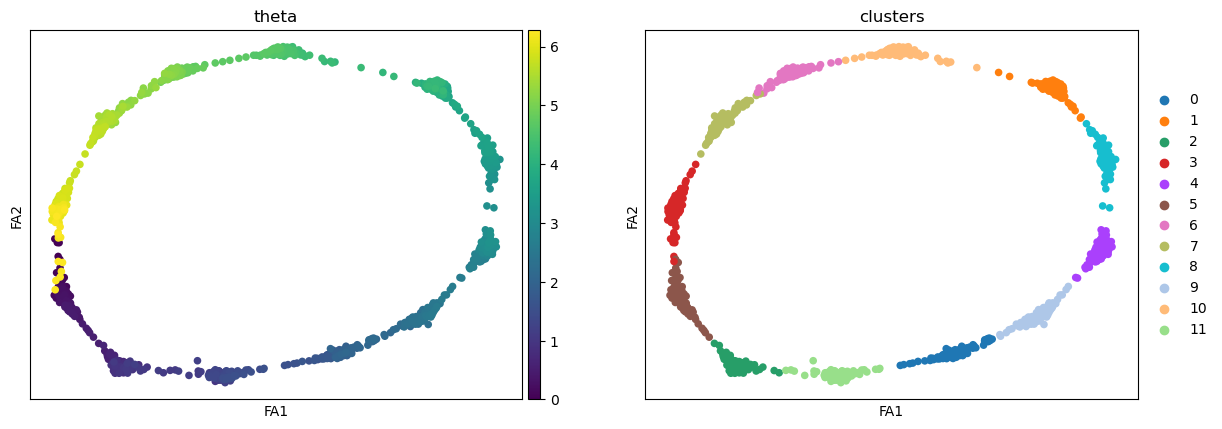

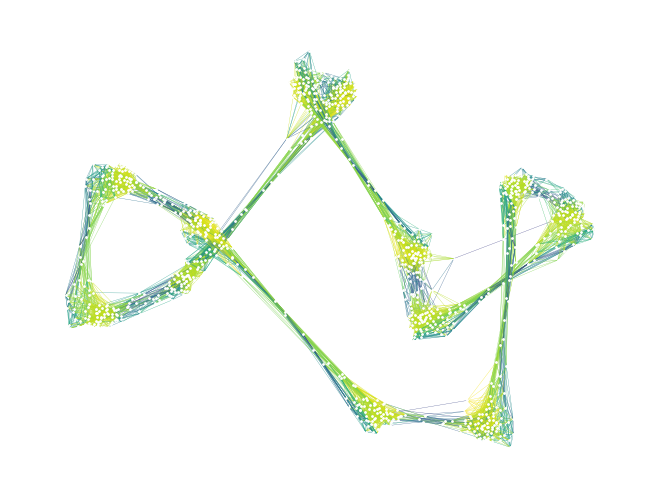

In [19]:
def plotad(point_ad):
    sc.tl.draw_graph(point_ad)
    sc.tl.leiden(adata=point_ad,resolution=0.5,key_added='clusters')
    sc.tl.umap(point_ad)
    sc.pl.umap(point_ad,color=['theta','clusters'])
    sc.pl.draw_graph(point_ad,color=['theta','clusters'])
for ad in [big_knn_ad,small_knn_ad,min_trimed_ad,max_trimed_ad]:
    plotad(ad)
    drawGraph(ad.obsp["distances"],ad.obsp["curvature"])